# Training Classifiers

This notebook uses modified code to test model predictions of different fly behavioral states. 

In [30]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, recall_score,  accuracy_score, precision_score
from sklearn.model_selection import  RandomizedSearchCV

import scipy
from sklearn.model_selection import  cross_val_predict 

import matplotlib.pyplot as plt
import seaborn as sn
import pathlib
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()

### Reading in the data 

In [48]:
filename = 'CxHP8_gtACR1_grooming_trials_updated_annotations.pq'
file_path = pathlib.Path.cwd().parent.joinpath('data')
data = pd.read_parquet(file_path.joinpath(filename), engine='pyarrow')

# filter data to include data w/ behavior labels
# data = data[~np.isnan(data['behavior_id'].values)].reset_index(drop=True)

# create an other category (need this for truly assessing the dataset)
data.loc[np.isnan(data['behavior_id'].values), 'behavior_annotations'] = 'other'
data.loc[np.isnan(data['behavior_id'].values), 'behavior_id'] = 7

### Defining Behavioral Features For Prediction 

In [50]:
feature_set_1 = [
 'fictrac_delta_rot_lab_x_mms',
 'fictrac_delta_rot_lab_y_mms',
 'fictrac_delta_rot_lab_z_mms',
 'L1A_rot',
 'R1A_rot',
 'L2A_rot',
 'R2A_rot',
 'L3A_rot',
 'R3A_rot',
 'L1B_rot',
 'R1B_rot',
 'L2B_rot',
 'R2B_rot',
 'L3B_rot',
 'R3B_rot',
 'L1C_rot',
 'R1C_rot',
 'L2C_rot',
 'R2C_rot',
 'L3C_rot',
 'R3C_rot',
 'L1A_flex',
 'R1A_flex',
 'L2A_flex',
 'R2A_flex',
 'L3A_flex',
 'R3A_flex',
 'L1B_flex',
 'R1B_flex',
 'L2B_flex',
 'R2B_flex',
 'L3B_flex',
 'R3B_flex',
 'L1C_flex',
 'R1C_flex',
 'L2C_flex',
 'R2C_flex',
 'L3C_flex',
 'R3C_flex',
 'L1D_flex',
 'R1D_flex',
 'L2D_flex',
 'R2D_flex',
 'L3D_flex',
 'R3D_flex',
 'L1A_abduct',
 'R1A_abduct',
 'L2A_abduct',
 'R2A_abduct',
 'L3A_abduct',
 'R3A_abduct',
 'L1A_rot_d1',
 'L1A_rot_d2',
 'R1A_rot_d1',
 'R1A_rot_d2',
 'L2A_rot_d1',
 'L2A_rot_d2',
 'R2A_rot_d1',
 'R2A_rot_d2',
 'L3A_rot_d1',
 'L3A_rot_d2',
 'R3A_rot_d1',
 'R3A_rot_d2',
 'L1B_rot_d1',
 'L1B_rot_d2',
 'R1B_rot_d1',
 'R1B_rot_d2',
 'L2B_rot_d1',
 'L2B_rot_d2',
 'R2B_rot_d1',
 'R2B_rot_d2',
 'L3B_rot_d1',
 'L3B_rot_d2',
 'R3B_rot_d1',
 'R3B_rot_d2',
 'L1C_rot_d1',
 'L1C_rot_d2',
 'R1C_rot_d1',
 'R1C_rot_d2',
 'L2C_rot_d1',
 'L2C_rot_d2',
 'R2C_rot_d1',
 'R2C_rot_d2',
 'L3C_rot_d1',
 'L3C_rot_d2',
 'R3C_rot_d1',
 'R3C_rot_d2',
 'L1A_flex_d1',
 'L1A_flex_d2',
 'R1A_flex_d1',
 'R1A_flex_d2',
 'L2A_flex_d1',
 'L2A_flex_d2',
 'R2A_flex_d1',
 'R2A_flex_d2',
 'L3A_flex_d1',
 'L3A_flex_d2',
 'R3A_flex_d1',
 'R3A_flex_d2',
 'L1B_flex_d1',
 'L1B_flex_d2',
 'R1B_flex_d1',
 'R1B_flex_d2',
 'L2B_flex_d1',
 'L2B_flex_d2',
 'R2B_flex_d1',
 'R2B_flex_d2',
 'L3B_flex_d1',
 'L3B_flex_d2',
 'R3B_flex_d1',
 'R3B_flex_d2',
 'L1C_flex_d1',
 'L1C_flex_d2',
 'R1C_flex_d1',
 'R1C_flex_d2',
 'L2C_flex_d1',
 'L2C_flex_d2',
 'R2C_flex_d1',
 'R2C_flex_d2',
 'L3C_flex_d1',
 'L3C_flex_d2',
 'R3C_flex_d1',
 'R3C_flex_d2',
 'L1D_flex_d1',
 'L1D_flex_d2',
 'R1D_flex_d1',
 'R1D_flex_d2',
 'L2D_flex_d1',
 'L2D_flex_d2',
 'R2D_flex_d1',
 'R2D_flex_d2',
 'L3D_flex_d1',
 'L3D_flex_d2',
 'R3D_flex_d1',
 'R3D_flex_d2',
 'L1A_abduct_d1',
 'L1A_abduct_d2',
 'R1A_abduct_d1',
 'R1A_abduct_d2',
 'L2A_abduct_d1',
 'L2A_abduct_d2',
 'R2A_abduct_d1',
 'R2A_abduct_d2',
 'L3A_abduct_d1',
 'L3A_abduct_d2',
 'R3A_abduct_d1',
 'R3A_abduct_d2',
 'L1_smoothed_velo',
 'L2_smoothed_velo',
 'L3_smoothed_velo',
 'R1_smoothed_velo',
 'R2_smoothed_velo',
 'R3_smoothed_velo',
]

feature_set_2 =[
 'L1_smoothed_velo',
 'L2_smoothed_velo',
 'L3_smoothed_velo',
 'R1_smoothed_velo',
 'R2_smoothed_velo',
 'R3_smoothed_velo',
 'fictrac_delta_rot_lab_x_mms',
 'fictrac_delta_rot_lab_y_mms',
 'fictrac_delta_rot_lab_z_mms',
]

print(f'number of features in set 1 = {len(feature_set_1)}')
print(f'number of features in set 2 = {len(feature_set_2)}')

number of features in set 1 = 153
number of features in set 2 = 9


### Helpful Functions

In [51]:
def train_model(data,labels, model, ordered_labels, cv=10):
    '''Training a given classifier using x-fold cross validation. Returns the model, predictions and confusion matrix'''
    y_pred = cross_val_predict(model, data, labels, cv=cv)
    conf_mat = confusion_matrix(labels, y_pred) 
    df_cm = pd.DataFrame(conf_mat, index = ordered_labels,
                      columns = ordered_labels)
    train_model = model.fit(data, labels)
    return train_model, y_pred, df_cm

def plot_cm(df_cm, save_fig=False, filename='', cmap="BuPu"):
    '''Plots a confusion matrix with a given cmap'''
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True, cmap=cmap,fmt='g')
    plt.xlabel('prediction')
    plt.ylabel('ground truth')
    if save_fig:
        plt.savefig(filename)

def test_model(model,test_data,test_labels, ordered_labels):
    '''Runs prediction of a trained model and returns the model, confusion matrix and predictions'''
    final_pred = model.predict(test_data)
    test_accuracy = model.score(test_data, test_labels) 
    test_f1 = f1_score(test_labels, final_pred, average='weighted')
    test_recall = recall_score(test_labels, final_pred, average='weighted')
    test_precision = precision_score(test_labels,final_pred, average='weighted')
    print('Test Accuracy: %.4f,Test Precision: %.4f, Test Recall: %.4f, Test F1 Score: %.4f'%(test_accuracy, test_precision, test_recall, test_f1))

    conf_mat = confusion_matrix(test_labels, final_pred) 

    df_cm = pd.DataFrame(conf_mat, index = ordered_labels,
                      columns = ordered_labels)
    return model, df_cm, final_pred



def report(results, n_top=3):
    '''Utility function to report best scores'''
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            

## Preparing the Data
### Predicting behavioral classes -- Include "other" class (val 0)

In [53]:
data['behavior_annotations']

0        t1_grooming
1        t1_grooming
2        t1_grooming
3        t1_grooming
4        t1_grooming
            ...     
19795          other
19796          other
19797          other
19798          other
19799          other
Name: behavior_annotations, Length: 19800, dtype: object

In [52]:
print(f'Behavior Counts:')
print(data['behavior_annotations'].value_counts())

# prune dataset based on chosen feature set
features = feature_set_1
behaviors = data['behavior_annotations'].values
labels = data['behavior_id'].values.astype(int)

# behaviors to label correspndence
val, idx = np.unique(labels, return_index=True)
beh_labels = behaviors[idx]

# filter data
data_filt = data[features]
scaler=preprocessing.StandardScaler().fit(data_filt)  # apply standard scalar

# randomly permute indices
random_idxs = np.random.permutation(len(labels))
resort_behaviors = behaviors[random_idxs]
resort_labels = labels[random_idxs]
resort_data = scaler.transform(data_filt.iloc[random_idxs])

Behavior Counts:
t1_grooming          6321
other                5624
walking              3328
antennae_grooming    1806
standing             1592
t3_grooming           648
abdomen_grooming      348
ball_push             133
Name: behavior_annotations, dtype: int64


### Hyperparameter Random Search Across Models

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Type of classifiers to test
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(),
    SVC(),
    SVC(),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(max_iter=5000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


The hyperparameters for each type of model and the ranges/conditions within which to search

In [8]:
dataset_params = {
    'RBF SVM' : {'C': np.array([0.01, 1, 10]), 'gamma': ['scale', 'auto'],
                      'kernel': ['rbf'], 'class_weight':['balanced', None]},
    'Linear SVM' : {'C': np.array([0.01, 1, 10]),
                      'kernel': ['linear'], 'class_weight':['balanced', None]},
    'Decision Tree': {'splitter':['best','random'], 'criterion':['gini', 'entropy']},
    'Random Forest': {'n_estimators':np.arange(10, 110, 10), 'criterion':['gini', 'entropy']},
    'Nearest Neighbors': {'n_neighbors':np.arange(5, 105, 10),'algorithm':['auto', 'ball_tree', 'brute'],
                         'weights':['uniform','distance']},
    'Neural Net': {'hidden_layer_sizes':np.arange(10,150,10),'activation':['identity','tanh','relu','logistic'],
                  'solver':['sgd','adam'], 'alpha': np.array([0.001, 0.01, 0.1, 1]), 'learning_rate_init': np.array([0.1, 0.01, 0.001, 0.0001]),
                  'learning_rate':['constant', 'adaptive']} 
}

Run a randomized hyperparamter search - for each type of classifier run X (n_iter_search) models with different parameters and report the top three performing models in each class

In [7]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [10]:
# Random search for best classifier and parameter set
n_iter_search = 5
for ds_cnt, ds in enumerate(classifiers):
    name = names[ds_cnt]
    if name in dataset_params.keys():
        random_search = RandomizedSearchCV(ds, param_distributions=dataset_params[name], n_iter=n_iter_search, cv=5) #scoring = ['accuracy','f1', 'recall', 'precision'])
        
        start = time()
        random_search.fit(resort_data, resort_labels)
        print(name)
        print("RandomizedSearchCV took %.2f seconds for %d candidates"
              " parameter settings." % ((time() - start), n_iter_search))
        report(random_search.cv_results_)

Nearest Neighbors
RandomizedSearchCV took 125.25 seconds for 5 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.921 (std: 0.008)
Parameters: {'weights': 'distance', 'n_neighbors': 25, 'algorithm': 'ball_tree'}

Model with rank: 2
Mean validation score: 0.903 (std: 0.007)
Parameters: {'weights': 'uniform', 'n_neighbors': 25, 'algorithm': 'auto'}

Model with rank: 3
Mean validation score: 0.895 (std: 0.006)
Parameters: {'weights': 'distance', 'n_neighbors': 35, 'algorithm': 'ball_tree'}

Linear SVM
RandomizedSearchCV took 46.08 seconds for 5 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.999 (std: 0.001)
Parameters: {'kernel': 'linear', 'class_weight': None, 'C': 10.0}

Model with rank: 2
Mean validation score: 0.998 (std: 0.001)
Parameters: {'kernel': 'linear', 'class_weight': 'balanced', 'C': 1.0}

Model with rank: 3
Mean validation score: 0.998 (std: 0.001)
Parameters: {'kernel': 'linear', 'class_weight': None, 'C': 1.0}

Model wit

C:\Users\pratt\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Decision Tree
RandomizedSearchCV took 37.41 seconds for 5 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.987 (std: 0.002)
Parameters: {'splitter': 'best', 'criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.986 (std: 0.002)
Parameters: {'splitter': 'best', 'criterion': 'gini'}

Model with rank: 3
Mean validation score: 0.986 (std: 0.002)
Parameters: {'splitter': 'random', 'criterion': 'gini'}

Random Forest
RandomizedSearchCV took 181.13 seconds for 5 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.999 (std: 0.001)
Parameters: {'n_estimators': 80, 'criterion': 'entropy'}

Model with rank: 1
Mean validation score: 0.999 (std: 0.001)
Parameters: {'n_estimators': 30, 'criterion': 'gini'}

Model with rank: 3
Mean validation score: 0.999 (std: 0.001)
Parameters: {'n_estimators': 50, 'criterion': 'gini'}

Neural Net
RandomizedSearchCV took 382.63 seconds for 5 candidates parameter settings.
Model with rank: 1
Mean valida

### Grid search over the best performing models

In [58]:
from sklearn.model_selection import GridSearchCV

In [61]:
'''OLD'''
# grid_params = {
#     'Linear SVM' : {'C': np.array([0.01, 1, 10]),'kernel': ['linear'], 'class_weight':['balanced', None]},
#     'Random Forest': {'n_estimators':np.arange(10, 150, 10), 'criterion':['gini', 'entropy']},
#     'Neural Net': {'hidden_layer_sizes':np.array([80, 100, 120]),'activation':['identity','relu'],
#                   'solver':['adam', 'sgd'], 'alpha': np.array([0.001, 0.1]), 'learning_rate_init': np.array([0.01, 0.0001]),
#                   'learning_rate':['constant', 'adaptive'], 'max_iter': np.array([1000, 5000])} 
# }

# # Grid search on Neural Net
# grid_names = ['Neural Net']
# grid_models = [MLPClassifier()]

'''NEW'''
grid_params = {
    'Linear SVM' : {'C': np.array([0.01, 1, 10]),'kernel': ['linear'], 'class_weight':['balanced', None]},
    'Random Forest': {'n_estimators':np.arange(10, 150, 10), 'criterion':['gini', 'entropy']}
}
grid_names = ['Linear SVM', 'Random Forest']
grid_models = [SVC(), RandomForestClassifier()]

In [62]:
# run grid search for each model
for i, model in enumerate(grid_models):
    name = grid_names[i]
    if name in grid_params.keys():
        grid_search = GridSearchCV(model, param_grid=grid_params[name], cv=10, verbose=0, refit=True) 
        
        start = time()
        grid_search.fit(resort_data, resort_labels)
        print(name)
        print(f'GridSearchCV took {time() - start} seconds')
        report(grid_search.cv_results_)
        print(grid_search.best_params_)

Linear SVM
GridSearchCV took 4792.992547035217 seconds
Model with rank: 1
Mean validation score: 0.927 (std: 0.005)
Parameters: {'C': 10.0, 'class_weight': None, 'kernel': 'linear'}

Model with rank: 2
Mean validation score: 0.926 (std: 0.004)
Parameters: {'C': 1.0, 'class_weight': None, 'kernel': 'linear'}

Model with rank: 3
Mean validation score: 0.926 (std: 0.004)
Parameters: {'C': 10.0, 'class_weight': 'balanced', 'kernel': 'linear'}

{'C': 10.0, 'class_weight': None, 'kernel': 'linear'}
Random Forest
GridSearchCV took 6346.120256900787 seconds
Model with rank: 1
Mean validation score: 0.991 (std: 0.002)
Parameters: {'criterion': 'entropy', 'n_estimators': 130}

Model with rank: 2
Mean validation score: 0.991 (std: 0.003)
Parameters: {'criterion': 'entropy', 'n_estimators': 80}

Model with rank: 2
Mean validation score: 0.991 (std: 0.003)
Parameters: {'criterion': 'entropy', 'n_estimators': 90}

Model with rank: 2
Mean validation score: 0.991 (std: 0.003)
Parameters: {'criterion':

### Best parameters per model

#### Without the "other" class
Linear SVM
GridSearchCV took 52.35708665847778 seconds
Model with rank: 1
Mean validation score: 0.999 (std: 0.001)
Parameters: {'C': 10.0, 'class_weight': None, 'kernel': 'linear'}

Random Forest
GridSearchCV took 1762.313279390335 seconds
Model with rank: 1
Mean validation score: 1.000 (std: 0.001)
Parameters: {'criterion': 'gini', 'n_estimators': 120}

Model with rank: 1
Mean validation score: 0.999 (std: 0.001)
Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 80, 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 1000, 'solver': 'adam'}

Model with rank: 2
Mean validation score: 0.999 (std: 0.001)
Parameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0001, 'max_iter': 5000, 'solver': 'adam'}

#### With the "other" class

### Top performing models

Based on the confusion matrices, linear svm and random forest are best for classifying T1 grooming

Linear SVM
GridSearchCV took 4792.992547035217 seconds
Model with rank: 1
Mean validation score: 0.927 (std: 0.005)
Parameters: {'C': 10.0, 'class_weight': None, 'kernel': 'linear'}

Random Forest
GridSearchCV took 6346.120256900787 seconds
Model with rank: 1
Mean validation score: 0.991 (std: 0.002)
Parameters: {'criterion': 'entropy', 'n_estimators': 130}

Model: Random Forest
CrossVal Accuracy: 0.9907575757575757
CrossVal Precision: 0.9907731005257716
CrossVal Recall: 0.9907575757575757
CrossVal F1 Score: 0.9907547604385057
Test Accuracy: 1.0000,Test Precision: 1.0000, Test Recall: 1.0000, Test F1 Score: 1.0000
Model: Linear SVM
CrossVal Accuracy: 0.9266161616161617
CrossVal Precision: 0.9257720868231945
CrossVal Recall: 0.9266161616161617
CrossVal F1 Score: 0.9260993570050426
Test Accuracy: 0.9398,Test Precision: 0.9393, Test Recall: 0.9398, Test F1 Score: 0.9395


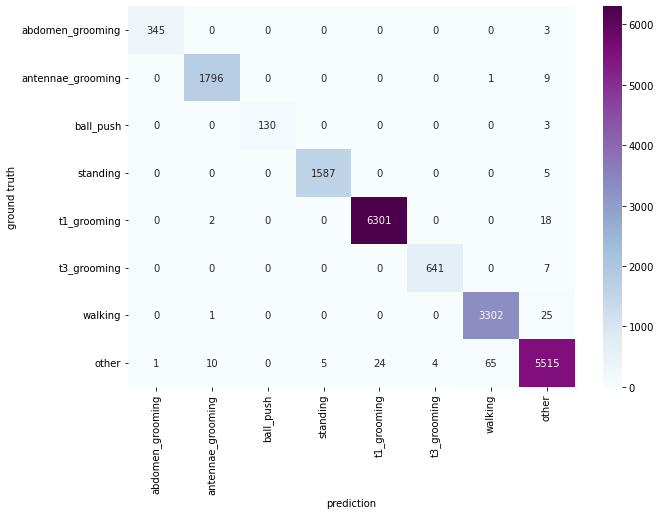

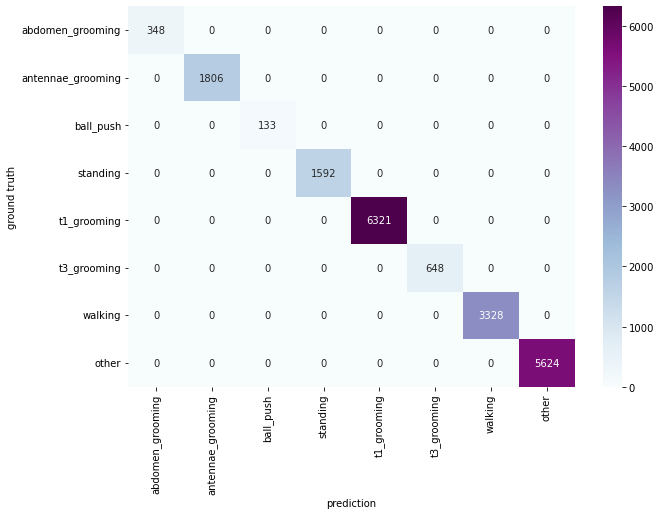

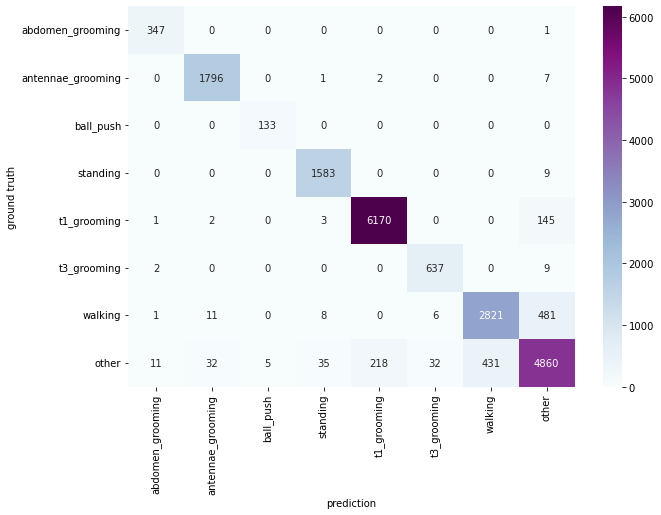

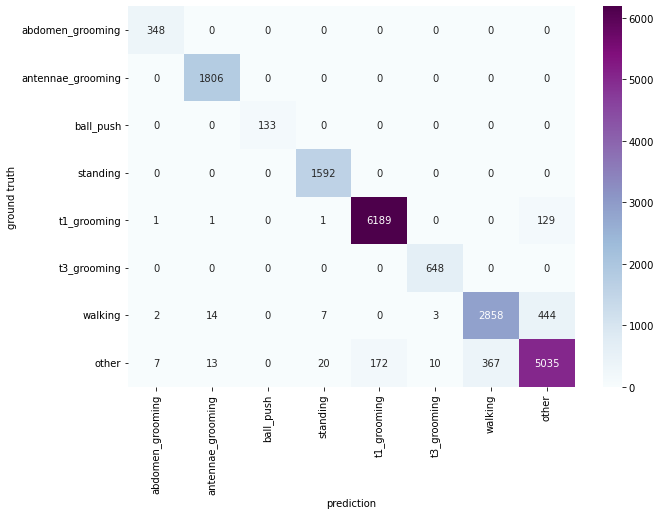

In [63]:
# Random Forest
random_forest_model_base = RandomForestClassifier(
    criterion='entropy', 
    n_estimators=130 
)

# Linear SVM
linear_SVM_model_base = SVC(
    C=10.0, 
    class_weight=None,
    kernel='linear'
)

# # Multi-Layer Perceptron
# mlp_model_base = MLPClassifier(
#     activation='relu', 
#     alpha=0.001, 
#     hidden_layer_sizes=80,
#     learning_rate='constant', 
#     learning_rate_init=0.01, 
#     solver='adam',
#     max_iter=1000
#     )

# model_list = [random_forest_model_base, linear_SVM_model_base, mlp_model_base]
# model_names = ['Random Forest', 'Linear SVM', 'MLP']

model_list = [random_forest_model_base, linear_SVM_model_base]
model_names = ['Random Forest', 'Linear SVM']
trained_models = []
for i, model_base in enumerate(model_list): 
    model, cross_pred, cm = train_model(resort_data, resort_labels, model_base, beh_labels)
    cross_accuracy = accuracy_score(resort_labels, cross_pred)
    cross_f1 = f1_score(resort_labels, cross_pred, average='weighted', zero_division=0)
    cross_recall = recall_score(resort_labels, cross_pred, average='weighted', zero_division=0)
    cross_precision = precision_score(resort_labels,cross_pred, average='weighted', zero_division=0)
    
    print(f'Model: {model_names[i]}\nCrossVal Accuracy: {cross_accuracy}\nCrossVal Precision: {cross_precision}\nCrossVal Recall: {cross_recall}\nCrossVal F1 Score: {cross_f1}')

    # save trained models
    trained_models.append(model)
    
    #Running a final prediction on the entire column to gauge overfitting
    model, train_cm, train_pred  = test_model(model, resort_data, resort_labels, beh_labels)

    plot_cm(cm, save_fig=False)
    plot_cm(train_cm, save_fig=False)

### Save the model

In [64]:
import pickle
from joblib import dump, load

In [66]:
date = '20241116'
model_names_save = [f'{date}_random_forest', f'{date}_linear_svm']
model_path = file_path = pathlib.Path.cwd().parent.joinpath('models')
for i, name in enumerate(model_names_save):
    output_filepath = model_path.joinpath(f'{name}.pkl')
    with open(output_filepath,'wb') as f:
        pickle.dump(trained_models[i], f)